# Introduction

In this section I would like to summarize my thinking process in a few sentences. In the first section, I am going to define a couple of functions for computing scores for specific personality traits. In the second section I will use these functions as well as discuss possible problem with missing values. In the following, third, section I will focus on the non-personality variables and I will mostly show how I dealt with missing values. In the fourth section, I will be looking into graphical representation of our data to gain even more insight into the data. In the fifth section, I will be looking into possible link between personality traits and performance. In the last section I briefly summarize the findings of this analysis.

# 0. Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc
from matplotlib import rc
from math import pi
%matplotlib inline

# 1. Scoring functions

I will be using the official scoring system for creating the functions. It can be found for example here - https://sites.temple.edu/rtassessment/files/2018/10/Table_BFPT.pdf

In [2]:
def score_extroversion(data):
    # data is a pandas dataframe, with elements [E1, E2, ...]
    score = 20 + data.iloc[:,0] - data.iloc[:,1] + data.iloc[:,2] - data.iloc[:,3] + data.iloc[:,4] - data.iloc[:,5] + data.iloc[:,6] - data.iloc[:,7] + data.iloc[:,8] - data.iloc[:,9]
    return score

def score_agreeableness(data):
    # data is a pandas dataframe, with elements [A1, A2, ...]
    score = 14 - data.iloc[:,0] + data.iloc[:,1] - data.iloc[:,2] + data.iloc[:,3] - data.iloc[:,4] + data.iloc[:,5] - data.iloc[:,6] + data.iloc[:,7] + data.iloc[:,8] + data.iloc[:,9]
    return score

def score_conscientiousness(data):
    # data is a pandas dataframe, with elements [C1, C2, ...]
    score = 14 + data.iloc[:,0] - data.iloc[:,1] + data.iloc[:,2] - data.iloc[:,3] + data.iloc[:,4] - data.iloc[:,5] + data.iloc[:,6] - data.iloc[:,7] + data.iloc[:,8] + data.iloc[:,9]
    return score

def score_neuroticism(data):
    # data is a pandas dataframe, with elements [N1, N2, ...]
    score = 38 - data.iloc[:,0] + data.iloc[:,1] - data.iloc[:,2] + data.iloc[:,3] - data.iloc[:,4] - data.iloc[:,5] - data.iloc[:,6] - data.iloc[:,7] - data.iloc[:,8] - data.iloc[:,9]
    return score

def score_openness(data):
    # data is a pandas dataframe, with elements [O1, O2, ...]
    score = 8 + data.iloc[:,0] - data.iloc[:,1] + data.iloc[:,2] - data.iloc[:,3] + data.iloc[:,4] - data.iloc[:,5] + data.iloc[:,6] + data.iloc[:,7] + data.iloc[:,8] + data.iloc[:,9]
    return score

# 2. Applying scoring functions

In [3]:
# Load both provided datasets
performance = pd.read_csv('performance.csv', index_col=0)
data = pd.read_csv('data.csv', sep='\t')

First of all we will focus on personality columns. Good idea is to check if we are not missing any values in these columns.
For now we do not care about missing values in the country column

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19719 entries, 0 to 19718
Data columns (total 57 columns):
race       19719 non-null int64
age        19719 non-null int64
engnat     19719 non-null int64
gender     19719 non-null int64
hand       19719 non-null int64
source     19719 non-null int64
country    19710 non-null object
E1         19719 non-null int64
E2         19719 non-null int64
E3         19719 non-null int64
E4         19719 non-null int64
E5         19719 non-null int64
E6         19719 non-null int64
E7         19719 non-null int64
E8         19719 non-null int64
E9         19719 non-null int64
E10        19719 non-null int64
N1         19719 non-null int64
N2         19719 non-null int64
N3         19719 non-null int64
N4         19719 non-null int64
N5         19719 non-null int64
N6         19719 non-null int64
N7         19719 non-null int64
N8         19719 non-null int64
N9         19719 non-null int64
N10        19719 non-null int64
A1         19719 non-null 

One thing we should be aware of is the fact that all scoring features should be in range (0,40). However, with our data it is possible to get out of this range if somebody skipped some questions. Lets see how many zeros we are working with

In [5]:
zeros = data.iloc[:,7:57].apply(pd.value_counts)
zeros

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,4679,4239,1617,2045,1858,5199,4628,1708,3444,1608,...,891,7100,421,7677,332,10470,286,2302,403,309
2,4483,4766,3263,4137,3234,6384,4224,3665,3937,3085,...,2036,6088,1106,5757,1045,5338,902,3625,1063,1200
3,5497,4671,4685,5501,4120,3707,3580,4539,3760,3650,...,4786,3832,3053,4103,4979,2102,3311,4921,2766,4030
4,3591,3575,5588,4842,5536,2865,3706,5104,4467,4904,...,6534,1873,6119,1401,7797,1101,7803,5406,6747,6724
5,1468,2467,4565,3193,4970,1563,3580,4702,4110,6471,...,5471,825,9019,780,5565,707,7416,3464,8739,7455


Looks like there might be a single row filled with zeros, lets try to find it

In [6]:
data.loc[data['E1'] == 0]

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
19064,13,52,2,2,1,2,IN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And just to make sure all personality columns are equal to zero

In [7]:
data.iloc[data.loc[data['E1'] == 0].index, 7:57].sum().sum() == 0

True

Since it is a single row filled with zeros we can afford to drop it from the original dataset as well as performance dataset

In [8]:
performance = performance.drop(data.loc[data['E1'] == 0].index)
data = data.drop(data.loc[data['E1'] == 0].index)

Now, we will merge both datasets together in a new dataset and use the functions defined in the previous section.
First we will append performance dataset right after to 7th column.

In [9]:
df = data.iloc[:,:7]
df['performance'] = performance.values

Now, we will apply scoring functions to respective columns

In [10]:
df['extroversion'] = score_extroversion(data.loc[:,'E1':'E10'])
df['agreeableness'] = score_agreeableness(data.loc[:,'A1':'A10'])
df['conscientiousness'] = score_conscientiousness(data.loc[:,'C1':'C10'])
df['neuroticism'] = score_neuroticism(data.loc[:,'N1':'N10'])
df['openness'] = score_openness(data.loc[:,'O1':'O10'])

df

,race,age,engnat,gender,hand,source,country,performance,extroversion,agreeableness,conscientiousness,neuroticism,openness
0,3,53,1,1,1,1,US,2,34,36,37,39,33
1,13,46,1,2,1,1,US,2,12,25,32,19,16
2,1,14,2,2,1,1,PK,5,25,28,39,4,35
3,3,19,2,2,1,1,RO,5,12,27,16,7,31
4,11,25,2,2,1,2,US,3,24,34,24,20,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,4,11,32,26,9,25
19715,3,37,1,2,1,2,US,1,15,26,22,29,20
19716,5,16,2,1,1,2,US,5,11,16,13,0,27
19717,12,16,1,1,1,5,NG,3,11,28,33,10,32


Double check the maximum and minimum of personality traits columns

In [11]:
df.iloc[:,8:13].max(), df.iloc[:,8:13].min()

(extroversion         40
 agreeableness        40
 conscientiousness    40
 neuroticism          40
 openness             40
 dtype: int64, extroversion         0
 agreeableness        0
 conscientiousness    0
 neuroticism          0
 openness             0
 dtype: int64)

# 3. Data exploration - text

Now we should try to get a general idea of data we are working with. Also we want to prepare the dataset for later, when we
will create the report

First of all, check datatypes for every variable and their count

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19718 entries, 0 to 19718
Data columns (total 13 columns):
race                 19718 non-null int64
age                  19718 non-null int64
engnat               19718 non-null int64
gender               19718 non-null int64
hand                 19718 non-null int64
source               19718 non-null int64
country              19709 non-null object
performance          19718 non-null int64
extroversion         19718 non-null int64
agreeableness        19718 non-null int64
conscientiousness    19718 non-null int64
neuroticism          19718 non-null int64
openness             19718 non-null int64
dtypes: int64(12), object(1)
memory usage: 2.1+ MB


Lets talk about missing values. Now, we can see 'country' has 9 NaN values, but we have to look at the bigger picture. If 'race', 'engnat', 'gender' and 'hand' are equal to zero that also means we are missing the proper input. Another thing we can find out is that 'country' contains values '(nu' which also probably means null.

In [13]:
df.country.value_counts().head(10)

US     8753
GB     1531
IN     1463
AU      974
CA      924
PH      649
(nu     369
IT      277
MY      247
PK      222
Name: country, dtype: int64

Then there are 'country' values of 'A1' and 'A2' which note uncertain country of connection, so we will exclude them as well

Lets try to see how many missing records we are talking about in total, which are missing at least one value

In [14]:
df[(df['race'] == 0) | (df['engnat'] == 0) | (df['gender'] == 0) | (df['hand'] == 0) | 
   (df['country'] == '(nu') | (df['country'].isna()) | (df['country'] == 'A1') | (df['country'] == 'A2')].count()

race                 723
age                  723
engnat               723
gender               723
hand                 723
source               723
country              714
performance          723
extroversion         723
agreeableness        723
conscientiousness    723
neuroticism          723
openness             723
dtype: int64

So we are missing 723 values in total, which is roughly 3.7% of the total number of records. The amount can still be considered small enough for us to drop these rows without any significant impact on any future analysis

In [15]:
indexes_to_drop = df[(df['race'] == 0) | (df['engnat'] == 0) | (df['gender'] == 0) | (df['hand'] == 0) | 
   (df['country'] == '(nu') | (df['country'].isna()) | (df['country'] == 'A1') | (df['country'] == 'A2')].index
df = df.drop(indexes_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18995 entries, 0 to 19718
Data columns (total 13 columns):
race                 18995 non-null int64
age                  18995 non-null int64
engnat               18995 non-null int64
gender               18995 non-null int64
hand                 18995 non-null int64
source               18995 non-null int64
country              18995 non-null object
performance          18995 non-null int64
extroversion         18995 non-null int64
agreeableness        18995 non-null int64
conscientiousness    18995 non-null int64
neuroticism          18995 non-null int64
openness             18995 non-null int64
dtypes: int64(12), object(1)
memory usage: 2.0+ MB


Lets continue exploring the dataset with the help of descriptive statistics

In [16]:
df.describe()

,race,age,engnat,gender,hand,source,performance,extroversion,agreeableness,conscientiousness,neuroticism,openness
count,18995.000000,1.899500e+04,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000,18995.000000
mean,5.359200,5.270053e+04,1.370729,1.618742,1.136088,1.949724,2.970992,20.121295,28.447170,23.453698,19.034693,29.095288
std,4.002672,7.255717e+06,0.483013,0.496324,0.406280,1.503374,1.428935,9.217610,7.144715,7.303669,8.621076,6.248738
min,1.000000,1.300000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,1.000000,2.000000,13.000000,24.000000,18.000000,13.000000,25.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,1.000000,3.000000,20.000000,29.000000,24.000000,19.000000,30.000000
75%,9.000000,3.100000e+01,2.000000,2.000000,1.000000,2.000000,4.000000,27.000000,34.000000,29.000000,25.000000,34.000000
max,13.000000,1.000000e+09,2.000000,3.000000,3.000000,5.000000,5.000000,40.000000,40.000000,40.000000,40.000000,40.000000


We can notice 'age' is little bit suspicious, looks like somebody made a mistake while filling in their age. Also, it is obvious from the code below some people filled their year of birth instead of age

In [17]:
df.age.nlargest(10)

4004     999999999
9987        412434
10715         2000
1649          1999
6614          1998
14628         1998
18661         1998
19614         1998
331           1997
1684          1997
Name: age, dtype: int64

Since the oldest living person at the moment is 117 years old, we will consider all values larger than 117 as false and drop these rows. Also, we will convert all values within range 1903-2007 to correct values.

In [18]:
indexes_to_drop = df[(df['age'] > 2007) | ((df['age'] > 117) & (df['age'] < 1903))].index
df = df.drop(indexes_to_drop)

df.loc[(df['age'] > 1903) & (df['age'] < 2007), 'age'] = 2020 - df.loc[(df['age'] > 1903) & (df['age'] < 2007), 'age']

 Just a small note, we have dropped another 9 rows, but still this shouldnt cause us any troubles.

In [19]:
df['age'].describe()

count    18986.000000
mean        26.202254
std         11.496196
min         13.000000
25%         18.000000
50%         22.000000
75%         31.000000
max        100.000000
Name: age, dtype: float64

Before we get to plotting, there is one more variable I would like to discuss - 'country'. Since we have large amounts of data just for a few countries, it might be a good idea to convert the countries into their respective continents. This should also be helpful later with creating demographic report.

We will create a new dataframe just for continent codes and later append it to our main dataset. Some values are already converted to continent codes so we want to skip these

In [20]:
conts = pd.DataFrame({'continent' : []})
for i,country in enumerate(list(df['country'].values)):
    try:
        conts.loc[i,'continent'] = pc.country_alpha2_to_continent_code(country)
    except KeyError:
        conts.loc[i,'continent'] = country
conts

,continent
0,NA
1,NA
2,AS
3,EU
4,NA
...,...
18981,AS
18982,NA
18983,NA
18984,AF


Looking at the counts for each continent we can spot value 'AP' which was not properly sorted. It is code for Asia/Pacific region, so we will put it as Asia

In [21]:
conts.loc[conts['continent'] == 'AP','continent'] = 'AS'

Now we should see only 6 different continents

In [22]:
conts['continent'].value_counts()

NA    9698
EU    3918
AS    3575
OC    1114
AF     390
SA     291
Name: continent, dtype: int64

Now we will just insert it right after 'country' column

In [23]:
df.insert(7, 'continent', conts['continent'].values)
df.head()

,race,age,engnat,gender,hand,source,country,continent,performance,extroversion,agreeableness,conscientiousness,neuroticism,openness
0,3,53,1,1,1,1,US,NA,2,34,36,37,39,33
1,13,46,1,2,1,1,US,NA,2,12,25,32,19,16
2,1,14,2,2,1,1,PK,AS,5,25,28,39,4,35
3,3,19,2,2,1,1,RO,EU,5,12,27,16,7,31
4,11,25,2,2,1,2,US,NA,3,24,34,24,20,24


# 4. Data exploration - graphical

Now it is the perfect time to do some graphical exploration of the data. We are mainly interested if we can spot any patterns
in the following plots or just get some sort of feeling of the data from visualizations.

Lets start with histograms of nonpersonality variables to see if we have missed something in the data exploration above

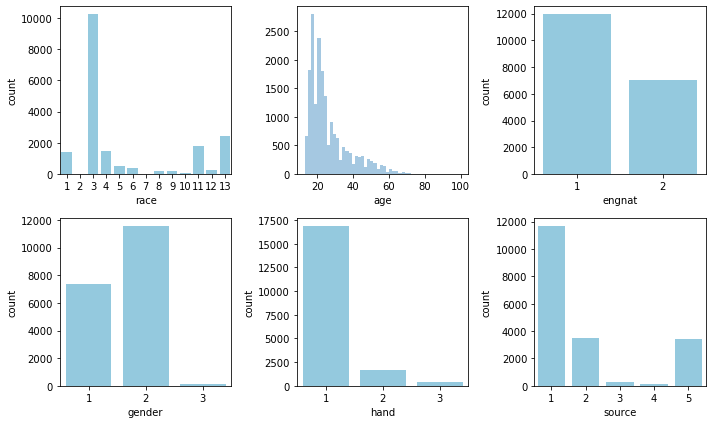

In [24]:
f, axes = plt.subplots(2, 3, figsize=(10, 6))
sns.countplot(x='race', data=df, color='skyblue', ax=axes[0,0])
sns.distplot(df['age'],  norm_hist=False, kde=False , ax=axes[0,1])
sns.countplot(x='engnat', data=df, color='skyblue', ax=axes[0,2])
sns.countplot(x='gender', data=df, color='skyblue', ax=axes[1,0])
sns.countplot(x='hand', data=df, color='skyblue', ax=axes[1,1])
sns.countplot(x='source', data=df, color='skyblue', ax=axes[1,2])
f.tight_layout()

So what insights do these histograms offer? It is probably nothing too shocking, but at least we got some idea what the data
is like. We can for example notice the distribution of participants is skewed towards the younger people, the test was taken
by more women than men and by more native english speakers than non-native.

Now we will take a quick glance at histogram of continent. Most respondents were from North America, then Asia and Europe had roughly the same amount of respondents, whereas Oceania, Africa and South America had quite low participation.

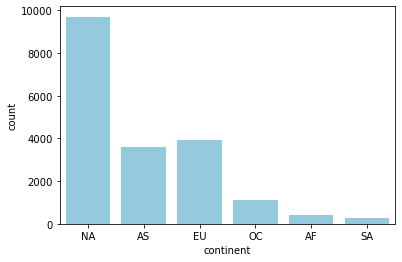

In [25]:
sns.countplot(x='continent', data=df, color='skyblue')

Now lets take a look at the personality traits variables. However, this time we will use boxplots, as I believe in this case
it will be easier to interpret and see any patterns. Furthermore we will have a nice compact comparison across all traits

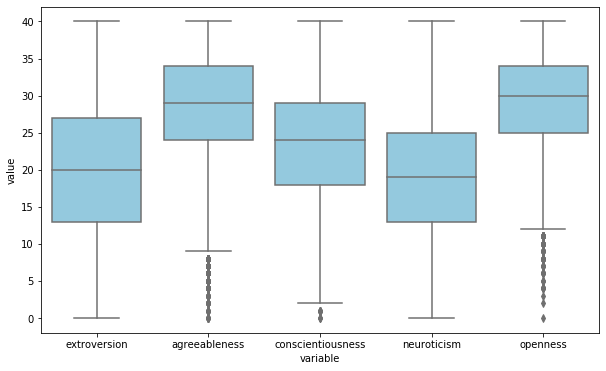

In [26]:
f = plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(df[['extroversion','agreeableness','conscientiousness','neuroticism','openness']]), color='skyblue')
plt.show()

Plot above provides a couple of interesting insights. Lets start with extroversion and neuroticism. Both of these variables
 are nicely normally distributed without any skewness, which to me makes sense, because it just reflects the distribution
 in general population and as far as I am aware both of these traits are normally distributed in general.
 
 Now conscientiousness, it is slightly skewed to right side having slightly higher median than the previous ones. Because I am
 not a psychologist I can only guess why is that so. It might just reflect population in general or if we take into consideratio nwe are working with data mostly provided by young people, they just might be slightly more ambitious than older people,  they might be students, so thats why they might be more hardworking and causing this slight skewness.
 
 Now the two most skewed distributions are agreeableness and openness. The skewness in openness I would explain in the same way
 as in the previous case, young people, at least from my impression are more open to changes and new experiences than older 
 people. And in my opinion agreeableness relates to the age distribution as well, younger people tend to listen more as
 they are not that experienced and are more influntiable.

Lastly we will take a look at a histogram of 'performance'

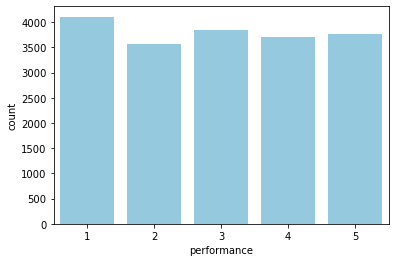

In [27]:
sns.countplot(x='performance', data=df, color='skyblue')

Looking at the plot we can see we have roughly the same amount of each performance level. This fact should make the looking
for a possible link between performance and personality traits easier.

# 5. Finding a link between performance and personality

Lets start with a correlation matrix plot and discuss it

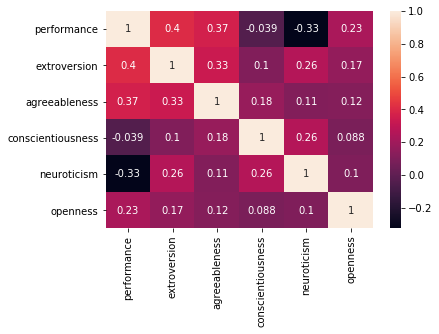

In [28]:
sns.heatmap(df[['performance','extroversion','agreeableness','conscientiousness','neuroticism','openness']].corr(), annot = True)

We can notice 2 weak positive correlations between performance and extroversion and agreeableness and 1 weak negative
correlation between performance and neuroticism. What does this mean? Extroverted people and people who dont have problems
adjusting their behaviors to suits others are slightly likely to be better performers. Also, people who are more emotionally
stable tend to perform slightly better.

I think the best visualization of previous statements can be achieved using grouped boxplot.

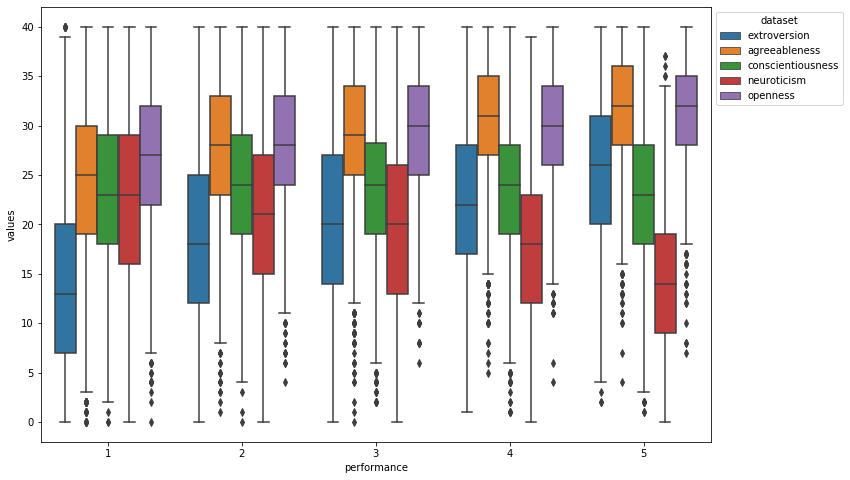

In [29]:
df1 = df[['performance','extroversion','agreeableness','conscientiousness','neuroticism','openness']].melt(id_vars=['performance'], var_name='dataset', value_name='values')
f = plt.figure(figsize=(12, 8))
sns.boxplot(data=df1, x='performance', y='values', hue='dataset')
plt.legend(title='dataset', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

So lets take a look at this plot by each individual trait and how it influences the performance.

Extroversion - with higher performance we can see the median of extroversion score is raising, meaning more extroverted people are likely to perform better. Also it is worth noting the difference between medians is greatest from performance level 1 to level 2 and from level 4 to level 5.

Agreeableness - even though we can observe relatively high values of agreeableness across all traits, the same fact as in extroversion applies here. What is quite interesting is checking the range of agreeableness values, which gets smaller as the performance increases. That also contributes to the argument that more 'adjustable' people are likely to perform better.

Conscientiousness - now this trait doesn't seem to correlate with performance at all. The median as well as the range of the values are roughly the same across all trait groups

Neuroticism - here we can observe a slowly decreasing trend of median values as performance increases. Especially the great difference between performance levels 4 and 5 suggests emotional stability contributes to higher performance.

Openness - this trait behaves similarly to agreeableness, there is a slowly increasing trend of median values as performance increases, however this time it is slower. We can observe the same behavior of the values range as well, getting narrower with higher performance levels.

# 6. Summary of exploratory analysis

So what kind of personality is the best performer? Previous section suggests we should check mainly 3 personality traits. People who are more extroverted than introverted, who can handle some level of stress and are emotionally stable, also we are looking for people, who can easily adjust to behaviour of others as well as are polite to others.